## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

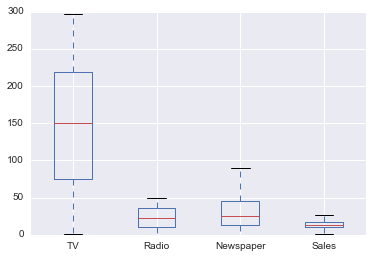

In [2]:
df.boxplot(return_type ='axes');

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

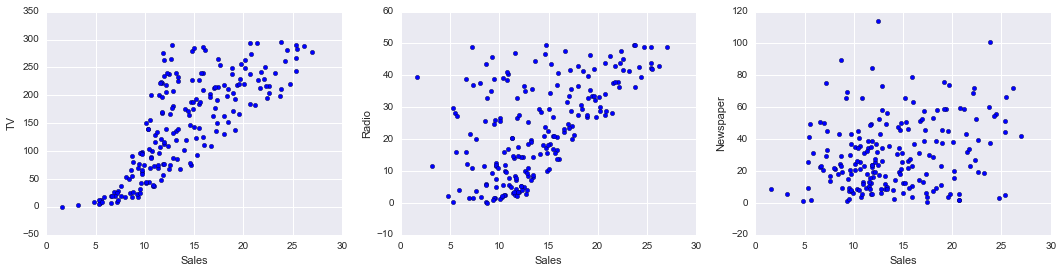

In [3]:
# Plot result
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*3)
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.scatter(df.loc[:,'Sales'],df.loc[:,'TV'])
axes1.set_xlabel("Sales")
axes1.set_ylabel("TV")
axes2.scatter(df.loc[:,'Sales'],df.loc[:,'Radio'])
axes2.set_xlabel("Sales")
axes2.set_ylabel("Radio")
axes3.scatter(df.loc[:,'Sales'],df.loc[:,'Newspaper'])
axes3.set_xlabel("Sales")
axes3.set_ylabel("Newspaper")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103cc9790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b2eddd0>]], dtype=object)

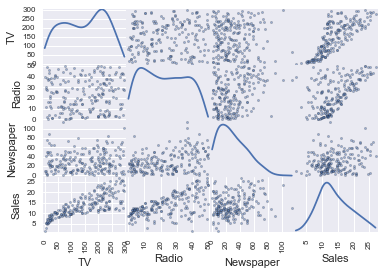

In [4]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df,diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer

### Answer:
The TV and Radio are related with Sales. However, the Newspaper is not related with Sales.

For TV and Radio, as the Sales increase, the values also bacome bigger.

For newspaper, as the Sales increase, the value doesn't change regularly.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [6]:
y = df.loc[:,'Sales']

b) Set X to be just the features described above in df

In [7]:
X = df.ix[:,0:3]

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
size = 200
# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [10]:
import numpy as np
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([ 0.0472521 ,  0.179922  , -0.00094408]))


e) Evalute the R^2 on training data. Is this good? Bad? Why?

### Answer:
The $R^2$ at this training data is 0.9 that is good. Since 1 is perfect prediction, so 0.9 indicates a high correlation. The predicted data and the real data are close.

Residual sum of squares: 2.79
Variance score: 0.90


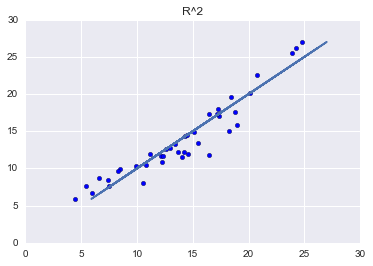

In [11]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

#plt.figure(figsize=(10,10))
plt.title('R^2')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

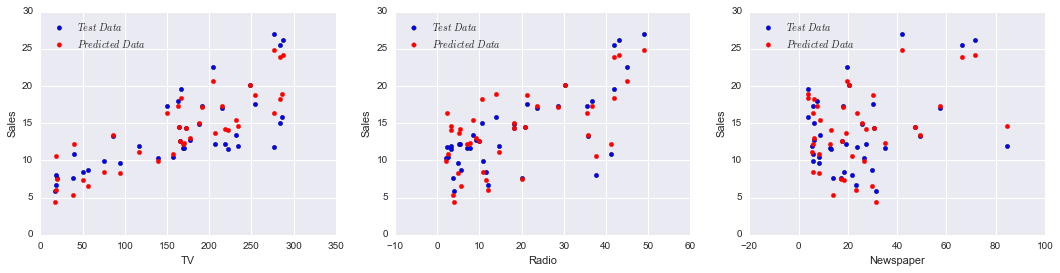

In [12]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*3)

axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.scatter(X_test['TV'],y_test,label='$Test$ $Data$')
axes1.scatter(X_test['TV'],regr.predict(X_test),color=['red'],label='$Predicted$ $Data$')
axes1.set_ylabel('Sales')
axes1.set_xlabel('TV')
axes1.legend(loc=2)

axes2.scatter(X_test['Radio'],y_test,label='$Test$ $Data$')
axes2.scatter(X_test['Radio'],regr.predict(X_test),color=['red'],label='$Predicted$ $Data$')
axes2.set_ylabel('Sales')
axes2.set_xlabel('Radio')
axes2.legend(loc=2)

axes3.scatter(X_test['Newspaper'],y_test,label='$Test$ $Data$')
axes3.scatter(X_test['Newspaper'],regr.predict(X_test),color=['red'],label='$Predicted$ $Data$')
axes3.set_ylabel('Sales')
axes3.set_xlabel('Newspaper')
axes3.legend(loc=2)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

### Answer:

For the coefficiency, which indicate the correlation of factor with sales.

From the linear regression coefficiency, we can get that the coefficiency for TV, Radio, Newspaper seperately are 0.0472521, 0.179922, 0.00094408. 

Before making conclusion, we should check the coefficiency of each features, for these three features, we can get that the rank is: Radio > TV > Newspaper.

In [13]:
# Normalize data
#X_train = preprocessing.scale(X_train)
#y_train = preprocessing.scale(y_train)
#X_test = preprocessing.scale(X_test)
#y_test = preprocessing.scale(y_test)
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([ 0.0472521 ,  0.179922  , -0.00094408]))


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

### Answer:

Normalizing the features is important because after normalizing we can get the coefficiency of $R^2$. We can interpret the result just by comparing the coefficiency of features.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

### Answer:

By plotting the 3D figure. We can rotate the plots to different plane and observe the correlation of the data(by interpolate dots). As an illustration, when TV is x-axis, Radio is y-axis and Sales is z-axis. The data from the XZ plane(X direction and Z direction) indicates the correlation of TV and Sales. In the same way, the data from the YZ plane(Y direction and Z direction) indicates the correlation of Radio and Sales.

<IPython.core.display.Javascript object>


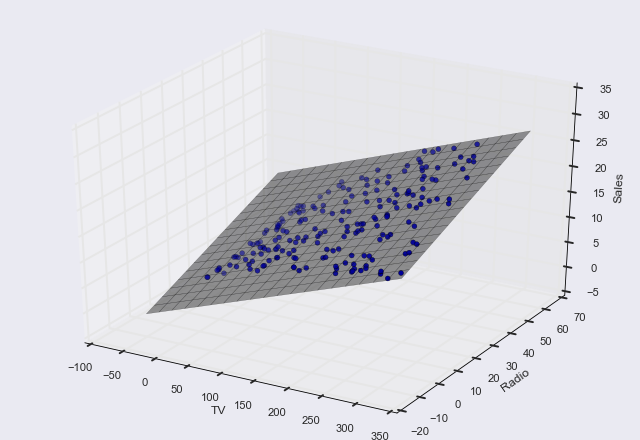

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm
%matplotlib notebook

fig = plt.figure()
ax=Axes3D(fig)

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

fit.summary()
x_surf = np.arange(-50, 350, 20)
y_surf = np.arange(-10, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(df.loc[:,'TV'], df.loc[:,'Radio'], df.loc[:,'Sales'], 'o')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

### Answer:

Through modifying, I found that when the learning rate is small, such as 0.0001, 0.00001, 0.000001, it will converge. And the more smaller the learning rate is, the more slower of converge rate.

But when the learing rate become bigger, such as 0.001, 0.01, it will not converge and shoot significantly.

The reason is that learning rate is related with gradient descent that search for optimal solution. When the step size small, it will take longer time to reach the goal. But when the step size become big, it will oscillate and may not get the solution, therefore, it doesn't converge at all.

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


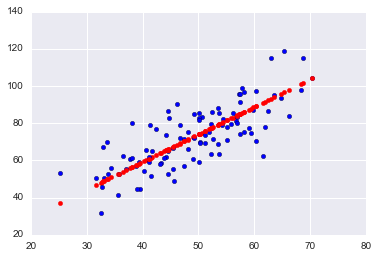

In [15]:
from numpy import *

#y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("./data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


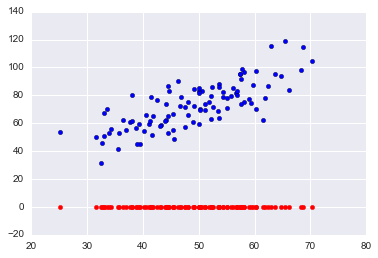

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


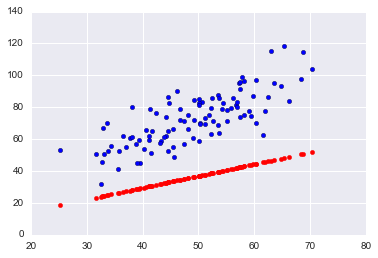

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


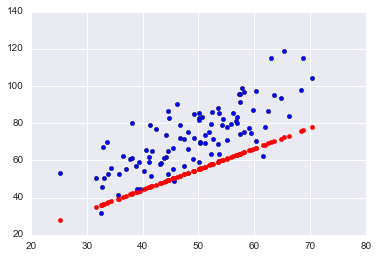

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


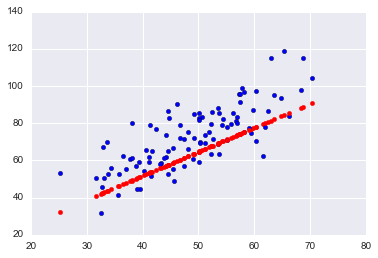

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


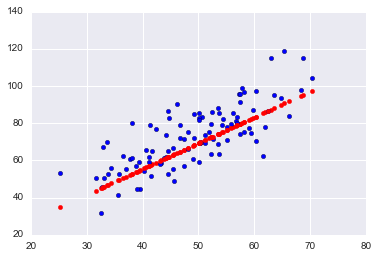

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


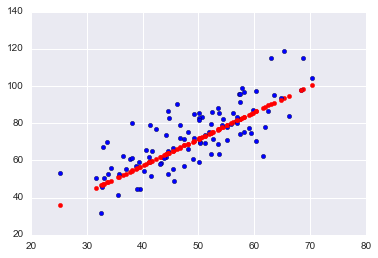

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


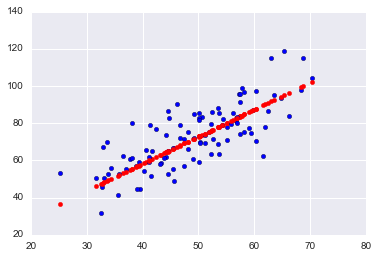

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


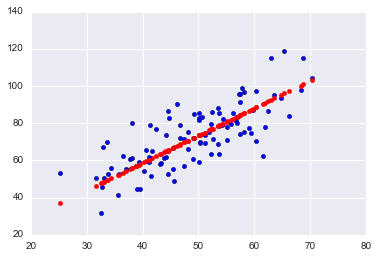

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


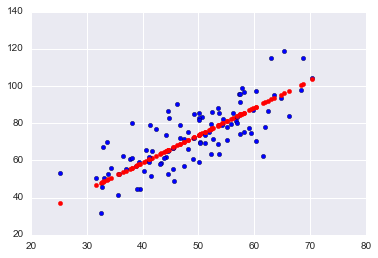

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


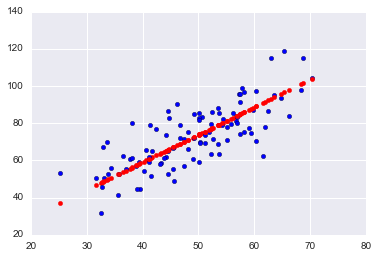

In [16]:
# Use this to visually discuss convergence rate based on learning rate
for num in range(0,10):
    run(num)
    plt.show()

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

### Answer: 

As the same with the analysis at above question, the convergence takes longer time when the learning rates are too small. Sometimes, it will doesn't converge at all when the learning rates are too big.

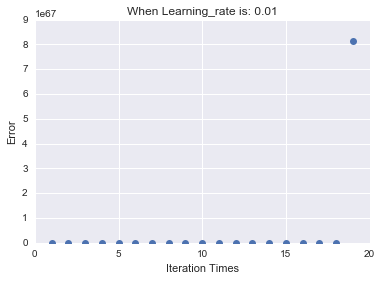

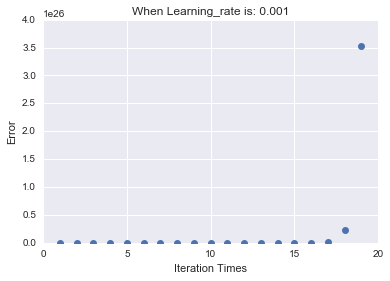

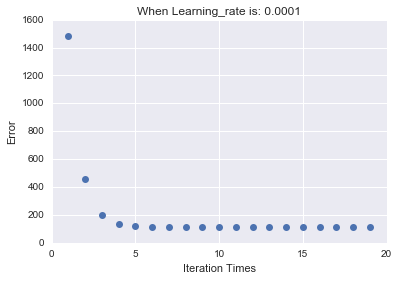

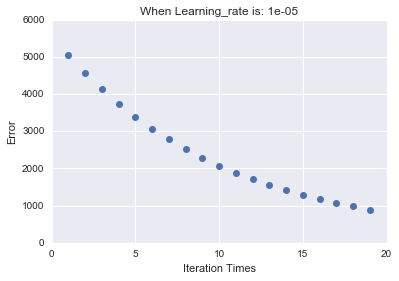

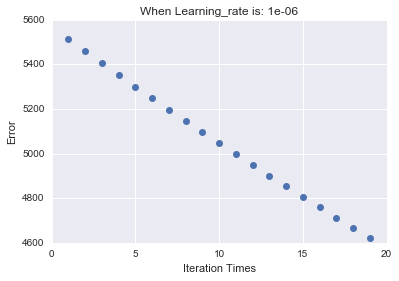

In [17]:
def running(num_iterations,learning_rate):
    points = genfromtxt("./data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    abc = compute_error_for_line_given_points(b, m, points)
    return abc

for (j,M) in enumerate([0.01,0.001,0.0001,0.00001,0.000001]):
    learning_rate = M
    N = np.arange(1,20)
    abc = []
    for num in range(1,np.size(N)+1):
        abc = abc + [running(num,learning_rate)]
    plt.plot(N,abc,'o')
    plt.title("When Learning_rate is: %s" %(learning_rate))
    plt.xlabel("Iteration Times")
    plt.ylabel("Error")
    plt.show()
